In [52]:
import pandas as pd

data = pd.read_csv('loan_data_set.csv')

data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP1000,Male,No,0,Graduate,Yes,9851,0.0,202.0,240.0,1.0,Rural,Y
1,LP1001,Male,No,1,Graduate,Yes,2941,4478.0,163.0,240.0,1.0,Urban,N
2,LP1002,Female,Yes,0,Not Graduate,Yes,7720,0.0,NaN,240.0,1.0,Urban,Y
3,LP1003,Male,No,1,Not Graduate,Yes,7158,0.0,219.0,360.0,1.0,Rural,Y
4,LP1004,Female,No,1,Not Graduate,No,6839,0.0,102.0,300.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP1609,Male,No,2,Not Graduate,No,7534,0.0,236.0,240.0,1.0,Rural,Y
610,LP1610,Male,No,3+,Graduate,Yes,5144,0.0,242.0,180.0,0.0,Urban,Y
611,LP1611,Male,Yes,0,Not Graduate,Yes,2939,0.0,251.0,180.0,1.0,Rural,Y
612,LP1612,Female,Yes,1,Graduate,Yes,3425,4478.0,111.0,240.0,1.0,Urban,N


In [53]:
# Importing the relavant libraries for modelling:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [54]:
# Data exploration

#loan id

data.Loan_ID.value_counts(dropna = False)



Loan_ID
LP1000    1
LP1412    1
LP1405    1
LP1406    1
LP1407    1
         ..
LP1205    1
LP1206    1
LP1207    1
LP1208    1
LP1613    1
Name: count, Length: 614, dtype: int64

In [55]:
#Gender


data.Gender.value_counts(dropna = False)

Gender
Male      316
Female    298
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

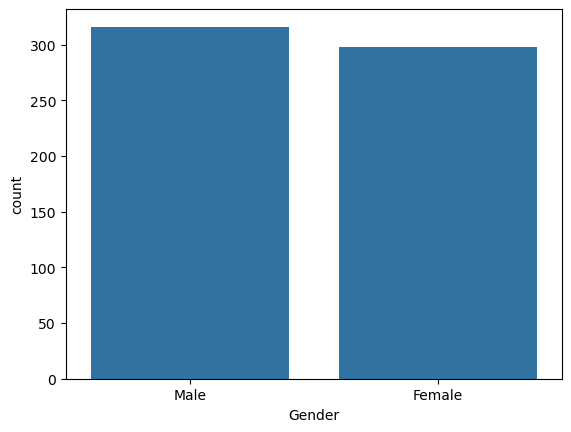

In [56]:
sns.countplot(x = 'Gender',data = data)

#Insight: the number of male applicants is really high compared to females

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

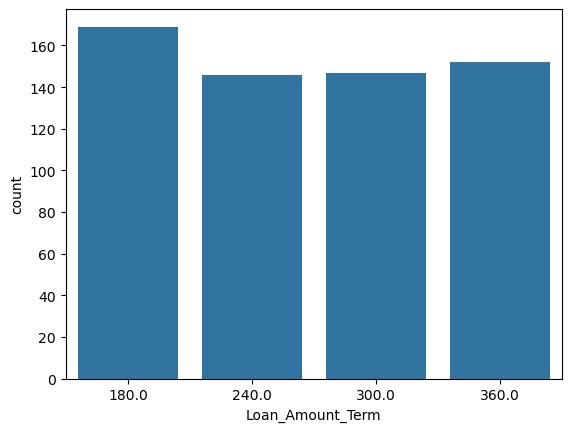

In [57]:
#Categorical columns : Married, education, self employed, property, loan status, loan amount term

# Exploring the categorical columns/features

#Loan amount term


sns.countplot(x = 'Loan_Amount_Term',data = data)


C:\Users\etern\AppData\Local\Temp\ipykernel_22360\1254500757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Loan_Status',data = data, palette = 'cubehelix')


<Axes: xlabel='Loan_Status', ylabel='count'>

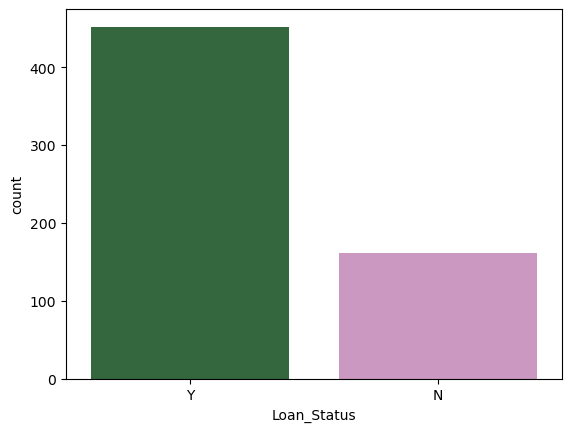

In [58]:
# loan status

sns.countplot(x = 'Loan_Status',data = data, palette = 'cubehelix')

In [59]:
#If i want to see the percentage of loans approved and not approved

count_app = len(data[data.Loan_Status == 'Y'])

count_not_app = len(data[data.Loan_Status == 'N'])

count_null = len(data[data.Loan_Status.isnull()])

total_count = len(data.Loan_Status)

print("Percent of loans aproved: {:.2f}%".format((count_app/(len(data.Loan_Status))*100)))
print("Percent of loans not aproved: {:.2f}%".format((count_not_app/(len(data.Loan_Status))*100)))
print("Percent of null values: {:.2f}%".format((count_null/(len(data.Loan_Status))*100)))

''' Number of loans approved are higher
 than rejected and also there are no null values in the column'''



Percent of loans aproved: 73.62%
Percent of loans not aproved: 26.38%
Percent of null values: 0.00%


' Number of loans approved are higher\n than rejected and also there are no null values in the column'

In [60]:
#Exploring Numerical columns:

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         594 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

data[numerical_features].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,594.000000
mean,5879.104235,2195.241042,223.496633
std,2488.619816,2240.397519,98.923195
min,1511.000000,0.000000,50.000000
25%,3662.250000,0.000000,139.500000
50%,5986.000000,0.000000,221.000000
75%,7948.250000,4478.000000,309.750000
max,9987.000000,4478.000000,398.000000


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

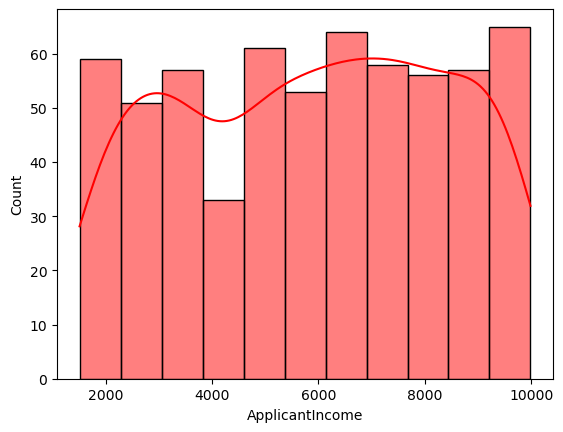

In [62]:
#Check the distribution of all of these numerical features

#Histogram

sns.histplot(data = data,x = 'ApplicantIncome',kde = True, color = 'red')


<Axes: xlabel='LoanAmount', ylabel='Count'>

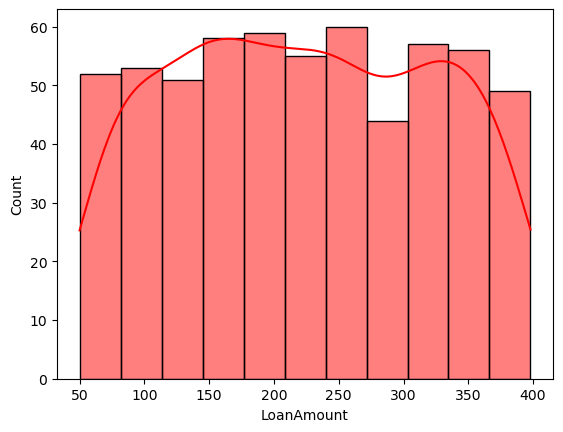

In [63]:
sns.histplot(data = data,x = 'LoanAmount',kde = True, color = 'red')


<Axes: xlabel='LoanAmount', ylabel='Density'>

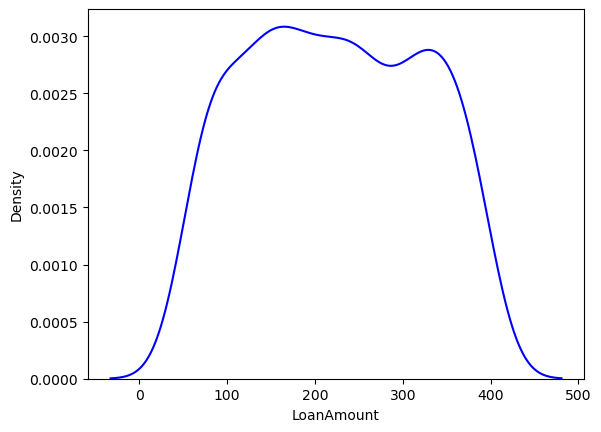

In [64]:
sns.kdeplot(x = data['LoanAmount'],color = 'b')

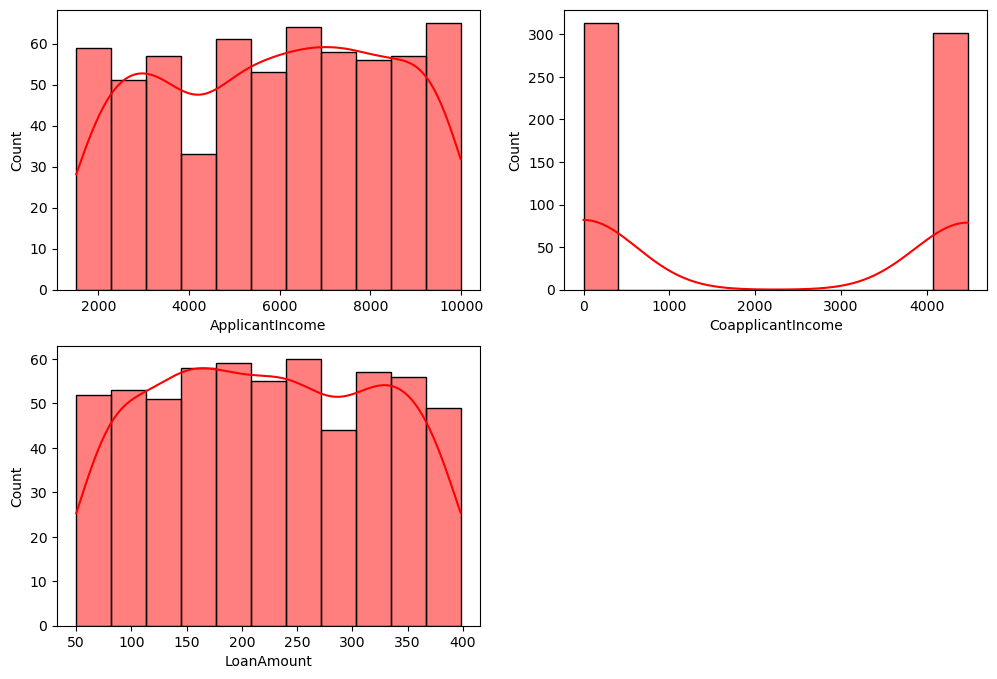

In [65]:
#We create the histogram for all the numerical features together

#All the graphs together

#for loop and subplot

plt.figure(figsize = (12,8))

for i in range(0,len(numerical_features)):
  plt.subplot(2,2,i+1)
  sns.histplot(data = data,x = data[numerical_features[i]],kde = True, color = 'red')







In [66]:
""" EDA - Exploratory data analysis:

1. Univariate analysis : When we find the distribution of single independent variables


Creating a Violin plot/ Box plot


Threshold for outliers:"""




' EDA - Exploratory data analysis:\n\n1. Univariate analysis : When we find the distribution of single independent variables\n\n\nCreating a Violin plot/ Box plot\n\n\nThreshold for outliers:'

<Axes: ylabel='ApplicantIncome'>

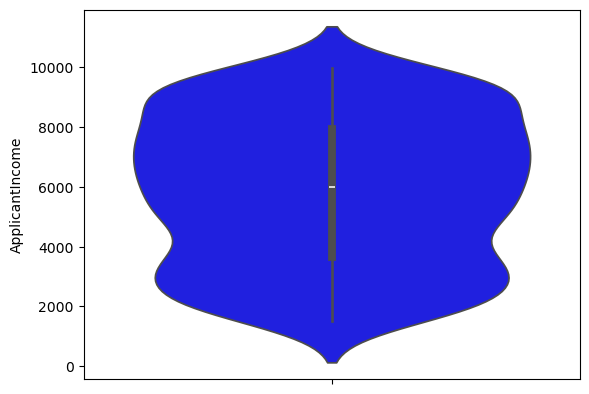

In [67]:
sns.violinplot(data = data, y = 'ApplicantIncome', color = 'blue')

<Axes: ylabel='CoapplicantIncome'>

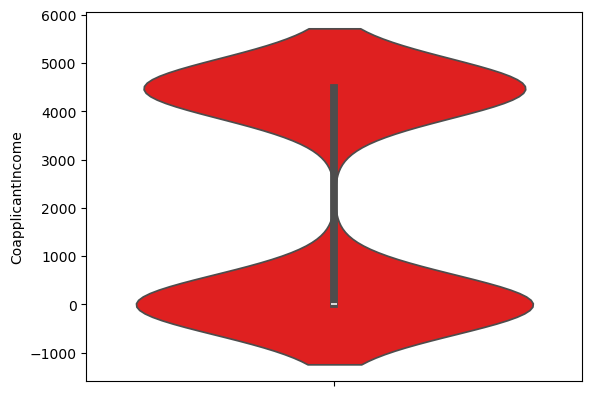

In [68]:
sns.violinplot(data = data, y = 'CoapplicantIncome', color = 'red')

In [69]:
""" Bi-variate analysis

Relationship between two variables

a. Sometimes we check the relationship between Target and independent variable
b. we check the relationship between two independent variables"""


' Bi-variate analysis\n\nRelationship between two variables\n\na. Sometimes we check the relationship between Target and independent variable\nb. we check the relationship between two independent variables'

<Axes: xlabel='Gender'>

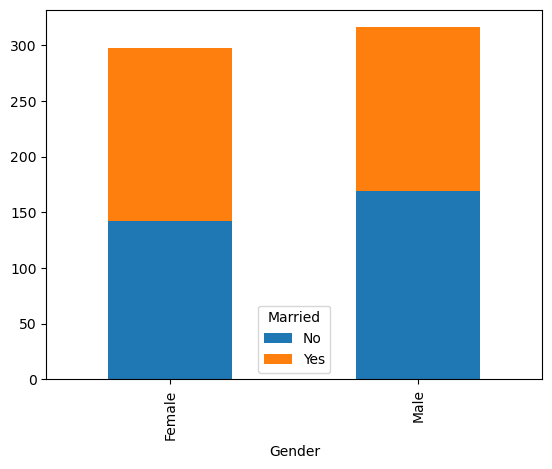

In [70]:
#Bi-variate:

#Categorical variables

#Married and Gender

pd.crosstab(data.Gender,data.Married).plot(kind = 'bar', stacked = True)





<Axes: xlabel='Self_Employed'>

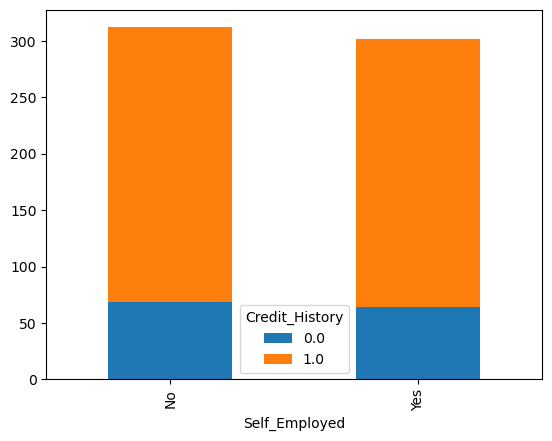

In [71]:
pd.crosstab(data.Self_Employed,data.Credit_History).plot(kind = 'bar', stacked = True)


In [72]:
"""EDA - Exploratory data analysis

Insights from the charts
Identifying outiers , distribution"""


'EDA - Exploratory data analysis\n\nInsights from the charts\nIdentifying outiers , distribution'

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Status'>

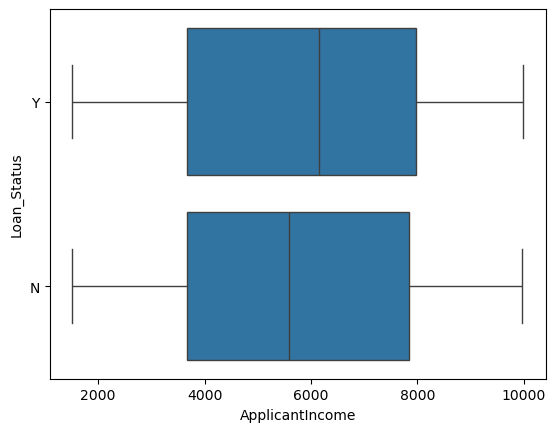

In [73]:
#relationship between categorical and numerical variables

#Loan status and applicant income


sns.boxplot(x = 'ApplicantIncome', y= 'Loan_Status', data = data)



Pearson correlation coefficient is 0.05010987665806418


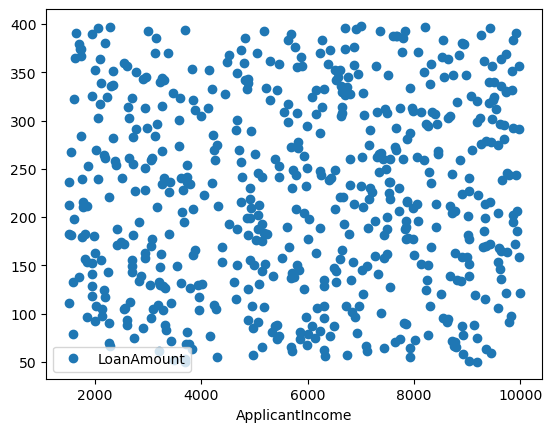

In [74]:
#Numerical to Numerical Relationship

#Applicant income and Loan Amount

data.plot(x = 'ApplicantIncome', y = 'LoanAmount', style = 'o')


print("Pearson correlation coefficient is", data['ApplicantIncome'].corr(data['LoanAmount']))


<Axes: >

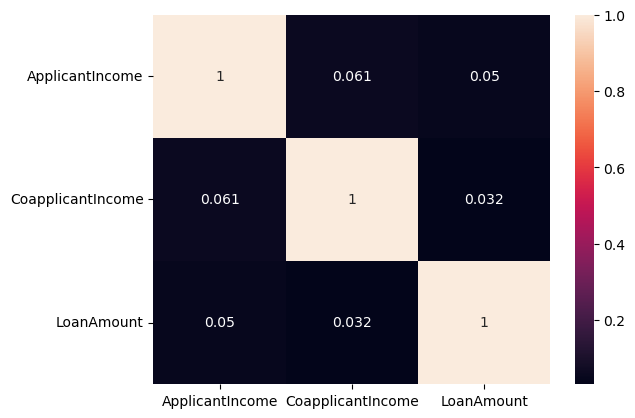

In [75]:
#Multivariate analysis

#Relationship between all the variables together

numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

sns.heatmap(data[numerical_features].corr(), annot = True, color = 'red')


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         594 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
data.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
#Data Preprocessing:

#Categorical columns - replace with mode

#Numerical columns - replace it with mean

data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)

data['Married'].fillna(data['Married'].mode()[0], inplace = True)

data['Self_Employed'].fillna(data['Dependents'].mode()[0], inplace = True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

data['Property_Area'].fillna(data['Property_Area'].mode()[0], inplace = True)

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)




C:\Users\etern\AppData\Local\Temp\ipykernel_22360\4201688068.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
C:\Users\etern\AppData\Local\Temp\ipykernel_22360\4201688068.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [79]:
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [80]:
#One hot encoding
#when we transform our categorical columns into numerical columns, we call it one hot encoding


model_data = data.copy()

model_data = model_data.drop(['Loan_ID'], axis = 1)
model_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,Yes,9851,0.0,202.000000,240.0,1.0,Rural,Y
1,Male,No,1,Graduate,Yes,2941,4478.0,163.000000,240.0,1.0,Urban,N
2,Female,Yes,0,Not Graduate,Yes,7720,0.0,223.496633,240.0,1.0,Urban,Y
3,Male,No,1,Not Graduate,Yes,7158,0.0,219.000000,360.0,1.0,Rural,Y
4,Female,No,1,Not Graduate,No,6839,0.0,102.000000,300.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,No,2,Not Graduate,No,7534,0.0,236.000000,240.0,1.0,Rural,Y
610,Male,No,3+,Graduate,Yes,5144,0.0,242.000000,180.0,0.0,Urban,Y
611,Male,Yes,0,Not Graduate,Yes,2939,0.0,251.000000,180.0,1.0,Rural,Y
612,Female,Yes,1,Graduate,Yes,3425,4478.0,111.000000,240.0,1.0,Urban,N


In [81]:
model_data = pd.get_dummies(model_data, dtype = int)
model_data.rename(columns = {'Loan_Status_Y':'Loan_Status'}, inplace = True)

model_data.drop(['Loan_Status_N'], axis = 1, inplace = True)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,9851,0.0,202.000000,240.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
1,2941,4478.0,163.000000,240.0,1.0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,7720,0.0,223.496633,240.0,1.0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,1
3,7158,0.0,219.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
4,6839,0.0,102.000000,300.0,1.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7534,0.0,236.000000,240.0,1.0,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
610,5144,0.0,242.000000,180.0,0.0,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,1
611,2939,0.0,251.000000,180.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,1,0,0,1
612,3425,4478.0,111.000000,240.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [82]:
#Removing outliers

ApplicantIncome_percentile_25 = model_data['ApplicantIncome'].quantile(0.25)
ApplicantIncome_percentile_75 = model_data['ApplicantIncome'].quantile(0.75)

IQR = ApplicantIncome_percentile_75 - ApplicantIncome_percentile_25

model_data['ApplicantIncome'] = model_data['ApplicantIncome'][~(model_data['ApplicantIncome']< (ApplicantIncome_percentile_25 - 1.5* IQR))|(model_data['ApplicantIncome'] > (ApplicantIncome_percentile_75 + 1.5* IQR))]

#print(percentile_25,percentile_75)

model_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,9851,0.0,202.000000,240.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
1,2941,4478.0,163.000000,240.0,1.0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,7720,0.0,223.496633,240.0,1.0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,1
3,7158,0.0,219.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
4,6839,0.0,102.000000,300.0,1.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7534,0.0,236.000000,240.0,1.0,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
610,5144,0.0,242.000000,180.0,0.0,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,1
611,2939,0.0,251.000000,180.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,1,0,0,1
612,3425,4478.0,111.000000,240.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [83]:
CoapplicantIncome_percentile_25 = model_data['CoapplicantIncome'].quantile(0.25)
CoapplicantIncome_percentile_75 = model_data['CoapplicantIncome'].quantile(0.75)

IQR = CoapplicantIncome_percentile_75 - CoapplicantIncome_percentile_25

model_data['CoapplicantIncome'] = model_data['CoapplicantIncome'][~(model_data['CoapplicantIncome']< (CoapplicantIncome_percentile_25 - 1.5* IQR))|(model_data['CoapplicantIncome'] > (CoapplicantIncome_percentile_75 + 1.5* IQR))]

#print(percentile_25,percentile_75)

model_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,9851,0.0,202.000000,240.0,1.0,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
1,2941,4478.0,163.000000,240.0,1.0,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,7720,0.0,223.496633,240.0,1.0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,1
3,7158,0.0,219.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,1
4,6839,0.0,102.000000,300.0,1.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7534,0.0,236.000000,240.0,1.0,0,1,1,0,0,...,1,0,0,1,1,0,1,0,0,1
610,5144,0.0,242.000000,180.0,0.0,0,1,1,0,0,...,0,1,1,0,0,1,0,0,1,1
611,2939,0.0,251.000000,180.0,1.0,0,1,0,1,1,...,0,0,0,1,0,1,1,0,0,1
612,3425,4478.0,111.000000,240.0,1.0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

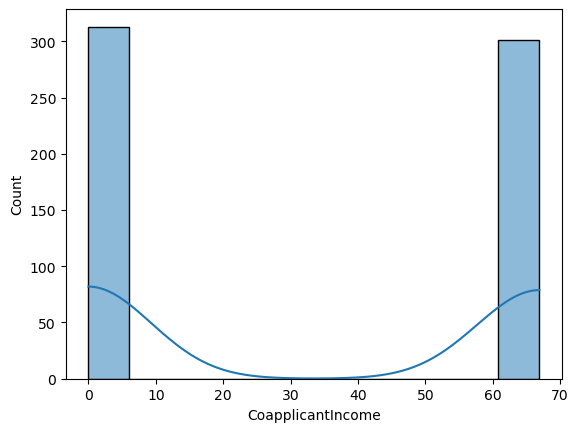

In [84]:
model_data.CoapplicantIncome = np.sqrt(model_data.CoapplicantIncome)

sns.histplot(data = model_data, x = 'CoapplicantIncome', kde = True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

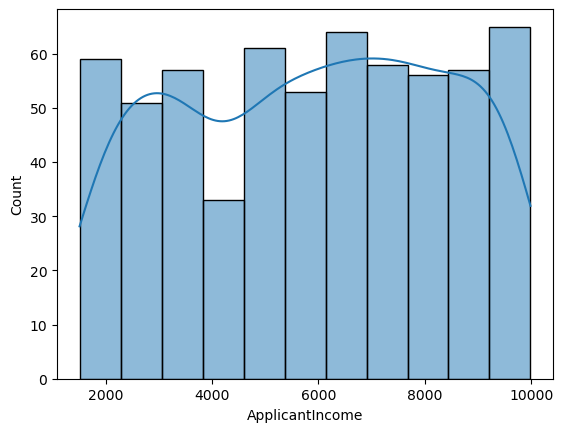

In [85]:
sns.histplot(data = model_data, x = 'ApplicantIncome', kde = True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

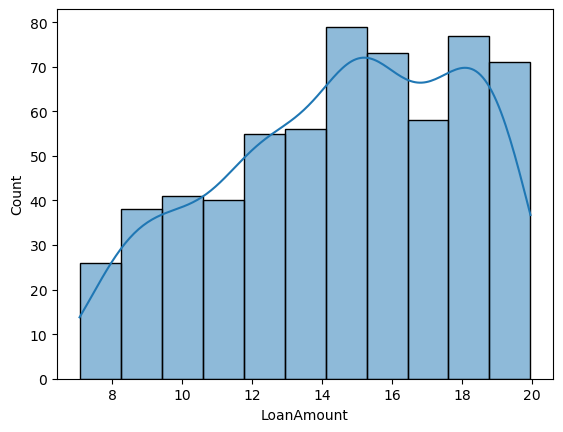

In [86]:
model_data.LoanAmount = np.sqrt(model_data.LoanAmount)

sns.histplot(data = model_data, x = 'LoanAmount', kde = True)

In [87]:
x = model_data.drop(['Loan_Status'], axis =1)

y = model_data['Loan_Status']

x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,9851,0.00000,14.212670,240.0,1.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
1,2941,66.91786,12.767145,240.0,1.0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
2,7720,0.00000,14.949804,240.0,1.0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1
3,7158,0.00000,14.798649,360.0,1.0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0
4,6839,0.00000,10.099505,300.0,1.0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7534,0.00000,15.362291,240.0,1.0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0
610,5144,0.00000,15.556349,180.0,0.0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
611,2939,0.00000,15.842980,180.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0
612,3425,66.91786,10.535654,240.0,1.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [88]:
x,y = SMOTE().fit_resample(x,y)


<Axes: xlabel='count', ylabel='Loan_Status'>

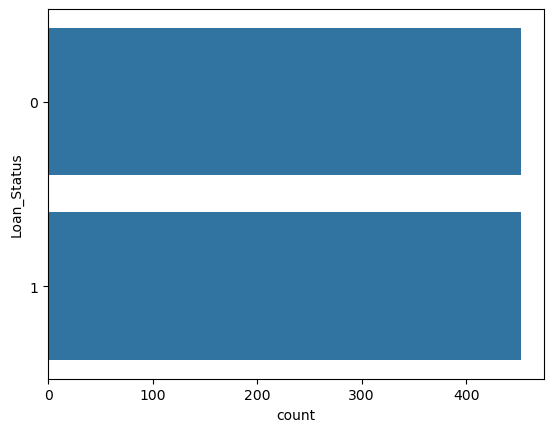

In [89]:
sns.countplot(y = y, data = model_data)

In [90]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,9851,0.000000,14.212670,240.000000,1.000000,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
1,2941,66.917860,12.767145,240.000000,1.000000,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
2,7720,0.000000,14.949804,240.000000,1.000000,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1
3,7158,0.000000,14.798649,360.000000,1.000000,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0
4,6839,0.000000,10.099505,300.000000,1.000000,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,5588,15.367388,13.505203,180.000000,0.229646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
900,7940,37.988613,13.877407,214.061412,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
901,5090,66.917860,14.090062,330.027249,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
902,3700,25.926998,15.260540,180.000000,0.612555,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [91]:
x = MinMaxScaler().fit_transform(x)
x

array([[0.9839547 , 0.        , 0.55452092, ..., 1.        , 0.        ,
        0.        ],
       [0.16871166, 1.        , 0.44228086, ..., 0.        , 0.        ,
        1.        ],
       [0.73253893, 0.        , 0.6117568 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42225106, 1.        , 0.54500078, ..., 1.        , 0.        ,
        0.        ],
       [0.25825861, 0.38744512, 0.63588437, ..., 0.        , 0.        ,
        0.        ],
       [0.1821614 , 0.06651125, 0.7062976 , ..., 0.        , 0.        ,
        1.        ]])

In [92]:
x

array([[0.9839547 , 0.        , 0.55452092, ..., 1.        , 0.        ,
        0.        ],
       [0.16871166, 1.        , 0.44228086, ..., 0.        , 0.        ,
        1.        ],
       [0.73253893, 0.        , 0.6117568 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42225106, 1.        , 0.54500078, ..., 1.        , 0.        ,
        0.        ],
       [0.25825861, 0.38744512, 0.63588437, ..., 0.        , 0.        ,
        0.        ],
       [0.1821614 , 0.06651125, 0.7062976 , ..., 0.        , 0.        ,
        1.        ]])

In [93]:
#Splitting the data into train and test

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)



In [94]:
""" Modelling

1. training
2. testing

Logistic regression - Classification alogorithm"""

' Modelling\n\n1. training\n2. testing\n\nLogistic regression - Classification alogorithm'

In [95]:
classifier = LogisticRegression(solver= 'saga', max_iter= 500, random_state = 1)

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        92
           1       0.73      1.00      0.84        89

    accuracy                           0.82       181
   macro avg       0.86      0.82      0.81       181
weighted avg       0.87      0.82      0.81       181

[[59 33]
 [ 0 89]]


Our KNN's model has the highest accuracy of:79.56%


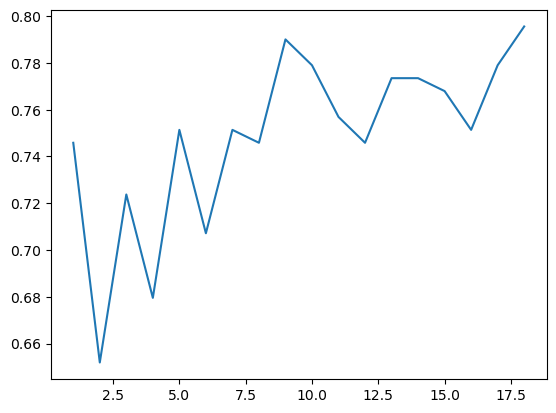

In [96]:
#KNN K nearest neighbor

#try to find the value of k
score = []

for i in range(1,19):
  KNclassifier = KNeighborsClassifier(n_neighbors= i)
  KNclassifier.fit(x_train,y_train)
  score.append(KNclassifier.score(x_test,y_test))

plt.plot(range(1,19),score)

max_acc = max(score)

print("Our KNN's model has the highest accuracy of:{:.2f}%".format(max_acc*100))


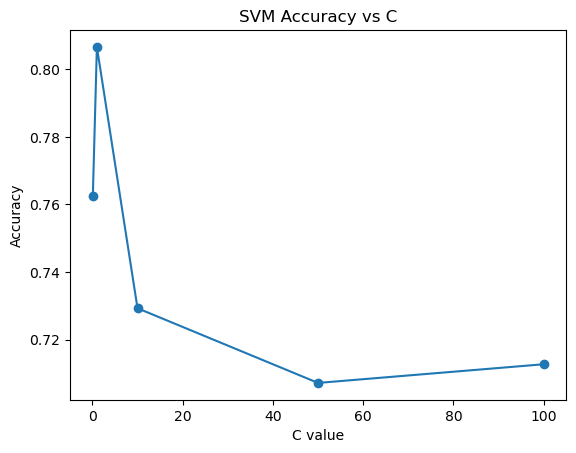

Best SVM Accuracy: 80.66%
Gaussian Naive Bayes Accuracy: 80.66%


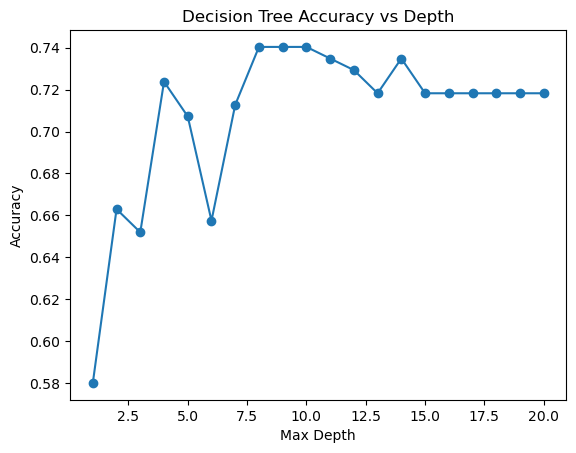

Best Decision Tree Accuracy: 74.03%


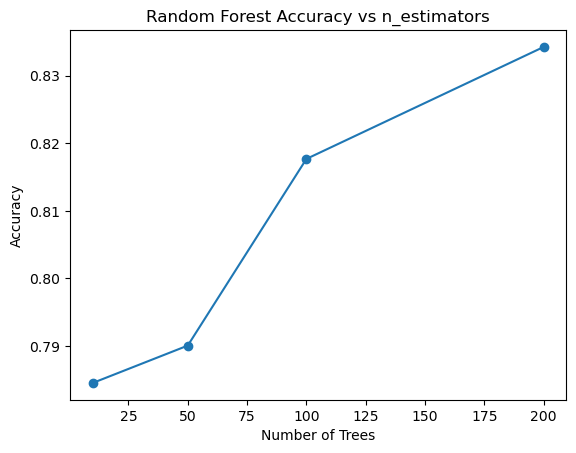

Best Random Forest Accuracy: 83.43%


In [97]:
""" SVM/Naive Bayes/ Gaussian Naive stats Decision tree, Bagging algo (Random forest)"""

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Support Vector Machine
svm_scores = []
C_values = [0.1, 1, 10, 50, 100]

for c in C_values:
    svm_clf = SVC(C=c, kernel='rbf')
    svm_clf.fit(x_train, y_train)
    svm_scores.append(svm_clf.score(x_test, y_test))

plt.plot(C_values, svm_scores, marker='o')
plt.title("SVM Accuracy vs C")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()

print("Best SVM Accuracy: {:.2f}%".format(max(svm_scores) * 100))


# Gaussian Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nb_acc = nb_clf.score(x_test, y_test)

print("Gaussian Naive Bayes Accuracy: {:.2f}%".format(nb_acc * 100))


# Decision Tree Classifier
dt_scores = []
depths = range(1, 21)

for d in depths:
    dt_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_clf.fit(x_train, y_train)
    dt_scores.append(dt_clf.score(x_test, y_test))

plt.plot(depths, dt_scores, marker='o')
plt.title("Decision Tree Accuracy vs Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

print("Best Decision Tree Accuracy: {:.2f}%".format(max(dt_scores) * 100))


# Random Forest (Bagging)
rf_scores = []
estimators = [10, 50, 100, 200]

for n in estimators:
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_clf.fit(x_train, y_train)
    rf_scores.append(rf_clf.score(x_test, y_test))

plt.plot(estimators, rf_scores, marker='o')
plt.title("Random Forest Accuracy vs n_estimators")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

print("Best Random Forest Accuracy: {:.2f}%".format(max(rf_scores) * 100))


In [98]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP1000,Male,No,0,Graduate,Yes,9851,0.0,202.000000,240.0,1.0,Rural,Y
1,LP1001,Male,No,1,Graduate,Yes,2941,4478.0,163.000000,240.0,1.0,Urban,N
2,LP1002,Female,Yes,0,Not Graduate,Yes,7720,0.0,223.496633,240.0,1.0,Urban,Y
3,LP1003,Male,No,1,Not Graduate,Yes,7158,0.0,219.000000,360.0,1.0,Rural,Y
4,LP1004,Female,No,1,Not Graduate,No,6839,0.0,102.000000,300.0,1.0,Rural,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP1609,Male,No,2,Not Graduate,No,7534,0.0,236.000000,240.0,1.0,Rural,Y
610,LP1610,Male,No,3+,Graduate,Yes,5144,0.0,242.000000,180.0,0.0,Urban,Y
611,LP1611,Male,Yes,0,Not Graduate,Yes,2939,0.0,251.000000,180.0,1.0,Rural,Y
612,LP1612,Female,Yes,1,Graduate,Yes,3425,4478.0,111.000000,240.0,1.0,Urban,N


In [99]:
def removing_outliers(df):

  for column in df.select_dtype(include = np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    low_threshold = Q1 - 1.5*IQR
    high_threshold = Q3 + 1.5*IQR

    df = df[(df[column]>= low_threshold)&(df[column]<= high_threshold)]

  return df


